In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
wt_biggan_fid = [46.12627586928443, 36.725471442334936, 45.263816760648865, 59.099872963979806]
wt_biggan_is = [36.86981201171875, 90.151123046875, 114.95414733886719, 113.7857437133789]

wt_biggan_fid_all = [46.12627586928443, 38.69797780301758, 35.600417543587014, 35.734239920594064, 36.725471442334936, 41.0855308511218, 45.263816760648865, 59.099872963979806]
wt_biggan_is_all = [36.86981201171875, 58.92177200317383, 84.67517852783203, 96.11550903320312, 90.151123046875, 116.6076431274414, 114.95414733886719, 113.7857437133789]

wt_pixel_biggan_fid = [48.1742808707574, 46.8467803627878, 58.12574769244668, 77.17858170274792]
wt_pixel_biggan_is = [67.89242553710938, 68.83635711669922, 72.88540649414062, 71.0080795288086]

pretrained_unet_fid = [23.522009101663116, 28.150389298933533, 36.75518726558886, 47.83404198548192]
pretrained_unet_is = [124.70301818847656, 211.6113739013672, 217.33993530273438, 214.1128692626953]

pretrained_pixel_unet_fid = [23.244376705362015, 25.714326649452687, 33.45746361748098, 43.920133175554895]
pretrained_pixel_unet_is = [111.00489807128906, 203.3090362548828, 215.92276000976562, 209.6133270263672]

pretrained_fid = [10.655149511664035, 21.044622128972946, 29.028895283938994, 39.228997678849055]
pretrained_is = [213.2483367919922, 326.86566162109375, 338.77703857421875, 329.44586181640625]

valid_recon_fid = [2.6041947196598016]
valid_recon_is = [218.35263061523438]

valid_fid = [13.78979164774023]
valid_is = [132.58859252929688]

samples_recon_z06_fid = [20.371041437755423]
samples_recon_z06_is = [96.44081115722656]

baseline = [250]

In [ ]:
# plt.figure(figsize=(10,3))
f, (ax2, ax) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [10, 1]})


ax2.plot(wt_biggan_is, wt_biggan_fid, label='not-so-BigGAN')
ax2.plot(wt_pixel_biggan_is, wt_pixel_biggan_fid, label='not-so-BigGAN-pixel')
ax2.plot(pretrained_unet_is, pretrained_unet_fid, label='Pretrained BigGAN $+$ not-so-BigGAN decoder')
ax2.plot(pretrained_pixel_unet_is, pretrained_pixel_unet_fid, label='Pretrained BigGAN $+$ not-so-BigGAN-pixel decoder')
ax2.plot(pretrained_is, pretrained_fid, label='Pretrained BigGAN')
ax2.plot(valid_recon_is, valid_recon_fid, 'ro', label='Validation set - Reconstructions')
ax2.plot(valid_is, valid_fid, 'bo', label='Validation set - Original')
ax2.plot(samples_recon_z06_is, samples_recon_z06_fid, '' label='not-so-BigGAN FID$^*$')

ax.hlines(250, 0, 350, linestyles='dashed', label='BigGAN baseline')

ax.set_ylim(260, 240)
ax.set_yscale('linear')
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_yscale('log')

ax.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop=False, top=False)  # don't put tick labels at the top
# ax.tick_params(labelbottom=False, bottom=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.xlabel('Inception Score (IS)')
plt.ylabel('Fréchet Inception Distance (FID)')
f.suptitle('FID vs IS with Different Truncation Levels')
# plt.legend(loc=1, prop={'size': 8})

handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 = labels2

text = ax.text(-0.2,1.05, "", transform=ax.transAxes)
lgd = ax2.legend(handles, labels, loc = (0.4, 0.55), bbox_to_anchor=(0.45,0.65), prop={'size': 6})


plt.savefig('figure1.jpg', bbox_extra_artists=(lgd, text), bbox_inches='tight')

plt.show()




In [ ]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [10, 1]})

# plot the same data on both axes
ax.plot(wt_biggan_is, wt_biggan_fid, label='not-so-BigGAN')
ax.plot(wt_pixel_biggan_is, wt_pixel_biggan_fid, label='not-so-BigGAN-pixel')
ax.plot(pretrained_unet_is, pretrained_unet_fid, label='Pretrained BigGAN $+$ not-so-BigGAN decoder')
ax.plot(pretrained_pixel_unet_is, pretrained_pixel_unet_fid, label='Pretrained BigGAN $+$ not-so-BigGAN-pixel decoder')
ax.plot(pretrained_is, pretrained_fid, label='Pretrained BigGAN')
ax.plot(valid_recon_is, valid_recon_fid, 'ro', label='Validation set - Reconstructions')
ax.plot(valid_is, valid_fid, 'bo', label='Validation set - Original')
ax.plot(samples_recon_z06_is, samples_recon_z06_fid, label='not-so-BigGAN FID$^*$')
ax.hlines(250, 0, 350, linestyles='dashed', label='BigGAN baseline')

ax2.plot(wt_biggan_is, wt_biggan_fid, label='not-so-BigGAN')
ax2.plot(wt_pixel_biggan_is, wt_pixel_biggan_fid, label='not-so-BigGAN-pixel')
ax2.plot(pretrained_unet_is, pretrained_unet_fid, label='Pretrained BigGAN $+$ not-so-BigGAN decoder')
ax2.plot(pretrained_pixel_unet_is, pretrained_pixel_unet_fid, label='Pretrained BigGAN $+$ not-so-BigGAN-pixel decoder')
ax2.plot(pretrained_is, pretrained_fid, label='Pretrained BigGAN')
ax2.plot(valid_recon_is, valid_recon_fid, 'ro', label='Validation set - Reconstructions')
ax2.plot(valid_is, valid_fid, 'bo', label='Validation set - Original')
ax2.plot(samples_recon_z06_is, samples_recon_z06_fid, label='not-so-BigGAN FID$^*$')
ax2.hlines(250, 0, 350, linestyles='dashed', label='BigGAN baseline')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(80, 0.000001)  # outliers only
ax2.set_ylim(260, 240)  # most of the data
ax.set_yscale('log', basey=10)


# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False, top=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'


plt.xlabel('Inception Score (IS)')
plt.ylabel('Fréchet Inception Distance (FID)')
f.suptitle('FID vs IS with Different Truncation Levels')

plt.show()


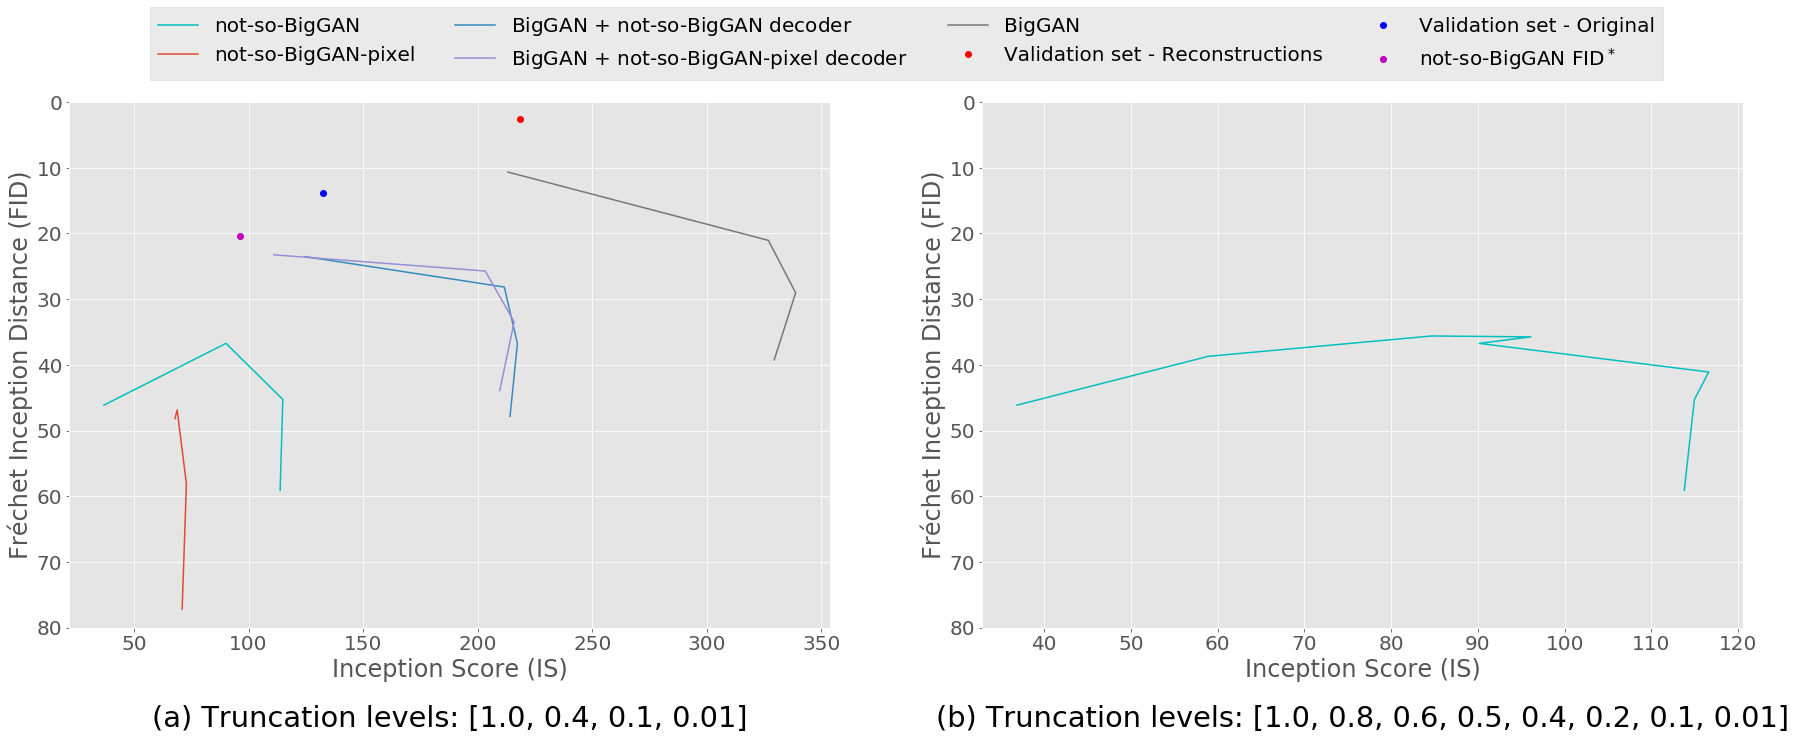

In [14]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import tikzplotlib
plt.style.use("ggplot")

plt.rcParams.update({'font.size': 20})


# f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [10, 1]})
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(30,10))
# plt.figure(figsize=(3,10))
# fig.subplots_adjust(bottom=0.3, wspace=0.33)


# plot the same data on both axes
ax1.plot(wt_biggan_is, wt_biggan_fid, 'c', label='not-so-BigGAN')
ax1.plot(wt_pixel_biggan_is, wt_pixel_biggan_fid, label='not-so-BigGAN-pixel')
ax1.plot(pretrained_unet_is, pretrained_unet_fid, label='BigGAN $+$ not-so-BigGAN decoder')
ax1.plot(pretrained_pixel_unet_is, pretrained_pixel_unet_fid, label='BigGAN $+$ not-so-BigGAN-pixel decoder')
ax1.plot(pretrained_is, pretrained_fid, label='BigGAN')
ax1.plot(valid_recon_is, valid_recon_fid, 'ro', label='Validation set - Reconstructions')
ax1.plot(valid_is, valid_fid, 'bo', label='Validation set - Original')
ax1.plot(samples_recon_z06_is, samples_recon_z06_fid,'mo', label='not-so-BigGAN FID$^*$')
# plt.hlines(250, 0, 350, linestyles='dashed', label='BigGAN baseline')

# ax1.yscale('linear')
ax1.set_ylim(80, 0)


ax1.set_xlabel('Inception Score (IS)')
ax1.set_ylabel('Fréchet Inception Distance (FID)')
ax1.set_title('(a) Truncation levels: [1.0, 0.4, 0.1, 0.01]', y=-0.20)

handles, labels = ax1.get_legend_handles_labels()
# text = ax1.text(-0.2,1.05, "", transform=ax.transAxes)



ax2.plot(wt_biggan_is_all, wt_biggan_fid_all, 'c')
ax2.set_ylim(80, 0)
ax2.set_xlabel('Inception Score (IS)')
ax2.set_ylabel('Fréchet Inception Distance (FID)')
ax2.set_title('(b) Truncation levels: [1.0, 0.8, 0.6, 0.5, 0.4, 0.2, But 0.1, 0.01]', y=-0.20)
# ax.yaxis.set_minor_locator(MultipleLocator(2))

ax1.legend(handles, labels,loc='upper center', 
             bbox_to_anchor=(1.1, 1.2),fancybox=False, shadow=False, ncol=4)

# tikzplotlib.clean_figure()
# tikzplotlib.save("fid_is.tex")

# plt.autoscale()
plt.gcf().subplots_adjust(bottom=0.15)
# plt.savefig('figure1.pdf')
plt.savefig('figure2.pdf', bbox_inches='tight')
plt.show()





In [ ]:
wt_biggan_fid = [46.12627586928443, 38.69797780301758, 35.600417543587014, 35.734239920594064, 36.725471442334936, 41.0855308511218, 45.263816760648865, 59.099872963979806]
wt_biggan_is = [36.86981201171875, 58.92177200317383, 84.67517852783203, 96.11550903320312, 90.151123046875, 116.6076431274414, 114.95414733886719, 113.7857437133789]

In [ ]:
plt.plot(wt_biggan_is, wt_biggan_fid, label='not-so-BigGAN')
plt.ylim(60, 0)

plt.xlabel('Inception Score (IS)')
plt.ylabel('Fréchet Inception Distance (FID)')
plt.title('FID vs IS with Different Truncation Levels')
plt.legend()

plt.savefig('fid_is_1.jpg')
plt.show()


In [ ]:
# Figure for WT
from PIL import Image
from wt_utils import wt, iwt, create_filters, create_inv_filters, zero_pad
import torchvision.transforms as transforms
from torchvision.utils import save_image

img = Image.open('/Users/seungwook.han@ibm.com/Downloads/n07697313_2828.JPEG')

In [ ]:
transform = transforms.Compose([transforms.CenterCrop(256), transforms.Resize(256), transforms.ToTensor()])
img = transform(img)

In [ ]:
filters = create_filters('cpu')
img_wt = wt(img.unsqueeze(0), filters, levels=2)

In [ ]:
plt.imshow(img_wt.squeeze().numpy().transpose(1,2,0))

In [ ]:
save_image(img_wt[:,:, :64, :64], 'tl.jpg')
save_image(img_wt[:,:, :64, 64:128], 'tr.jpg')
save_image(img_wt[:,:, 64:128, :64], 'bl.jpg')
save_image(img_wt[:,:, 64:128, 64:128], 'br.jpg')
save_image(img, 'original.jpg')
save_image(img_wt[:,:, :128, :128], 'wt.jpg')

In [ ]:
# Figure comparing WT vs interpolation
img = Image.open('/Users/seungwook.han@ibm.com/Downloads/n02107683_20.JPEG')

transform = transforms.Compose([transforms.CenterCrop(256), transforms.Resize(256), transforms.ToTensor()])
img = transform(img)

In [ ]:
import torch
import torch.nn.functional as F

filters = create_filters('cpu')
inv_filters = create_inv_filters('cpu')

img_pixel = img.clone()
img_wt = img.clone()

img_pixel = F.interpolate(F.interpolate(img_pixel.unsqueeze(0), 64, mode='bilinear'), 256, mode='bilinear').squeeze()
img_wt = wt(img_wt.unsqueeze(0), filters, levels=2)
img_wt = img_wt[:, :, :64, :64]
img_wt = zero_pad(img_wt, 256, 'cpu')
img_wt = iwt(img_wt, inv_filters, levels=2)

In [ ]:
save_image(img_pixel, 'img_pixel.jpg')
save_image(img_wt, 'img_wt.jpg')